# K-Means Clustering

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv(r"student_clustering.csv")
print("The Shape of Data is-",df.shape)
df.head()

The Shape of Data is- (200, 2)


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


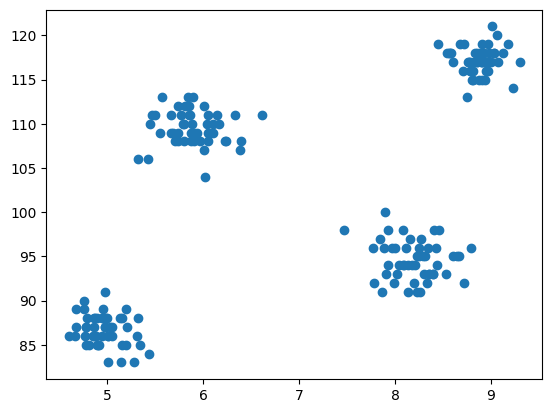

In [20]:
plt.scatter(df['cgpa'],df['iq'])

In [21]:
# Elbow Method
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)


In [22]:
wcss

[29957.898288,
 4184.14127,
 2503.397581,
 681.9696599999999,
 523.7131894763966,
 427.9627769877213,
 360.6007132471632,
 350.5433016926407,
 198.22433643678954,
 176.73118902921556]

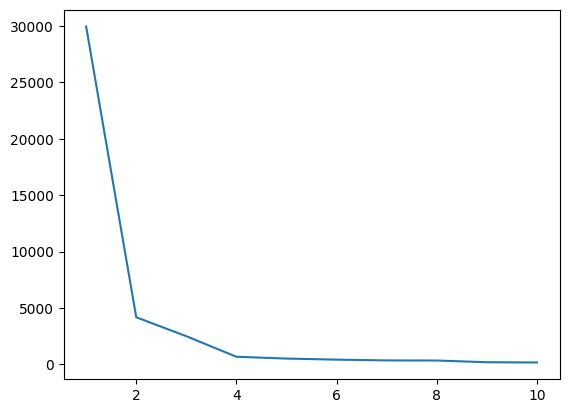

In [23]:
plt.plot(range(1,11),wcss)

In [24]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

In [25]:
X[y_means == 0]

array([[  8.8 , 115.  ],
       [  9.18, 119.  ],
       [  8.86, 117.  ],
       [  8.83, 118.  ],
       [  8.56, 118.  ],
       [  8.96, 116.  ],
       [  8.78, 116.  ],
       [  8.45, 119.  ],
       [  8.79, 116.  ],
       [  8.81, 115.  ],
       [  8.88, 115.  ],
       [  9.07, 117.  ],
       [  8.92, 118.  ],
       [  8.75, 113.  ],
       [  8.71, 116.  ],
       [  8.86, 118.  ],
       [  9.3 , 117.  ],
       [  9.01, 121.  ],
       [  8.97, 116.  ],
       [  9.  , 117.  ],
       [  8.76, 117.  ],
       [  8.78, 117.  ],
       [  9.23, 114.  ],
       [  9.03, 118.  ],
       [  9.13, 118.  ],
       [  8.91, 119.  ],
       [  8.98, 118.  ],
       [  9.03, 118.  ],
       [  8.86, 117.  ],
       [  8.89, 118.  ],
       [  8.97, 117.  ],
       [  8.72, 119.  ],
       [  8.93, 118.  ],
       [  8.58, 118.  ],
       [  8.94, 117.  ],
       [  8.6 , 117.  ],
       [  8.77, 117.  ],
       [  8.81, 116.  ],
       [  8.54, 118.  ],
       [  8.97, 119.  ],


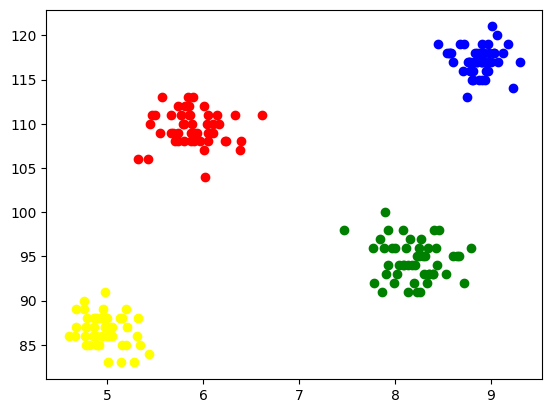

In [26]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],color="blue")
plt.scatter(X[y_means==1,0],X[y_means==1,1],color="green")
plt.scatter(X[y_means==2,0],X[y_means==2,1],color="red")
plt.scatter(X[y_means==3,0],X[y_means==3,1],color="yellow")


In [27]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [28]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

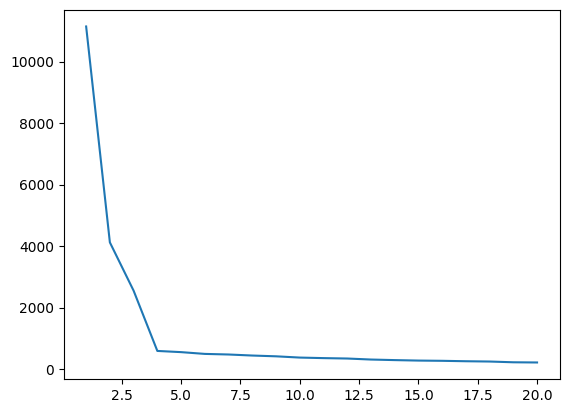

In [29]:
plt.plot(range(1,21),wcss)

In [32]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [33]:

km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [34]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [35]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()

In [31]:
import sys
!{sys.executable} -m pip install plotly


  Using cached plotly-6.5.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached narwhals-2.14.0-py3-none-any.whl.metadata (13 kB)
Using cached plotly-6.5.0-py3-none-any.whl (9.9 MB)
Using cached narwhals-2.14.0-py3-none-any.whl (430 kB)

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhal

In [11]:
# From Scratch
# K Means Clustering 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

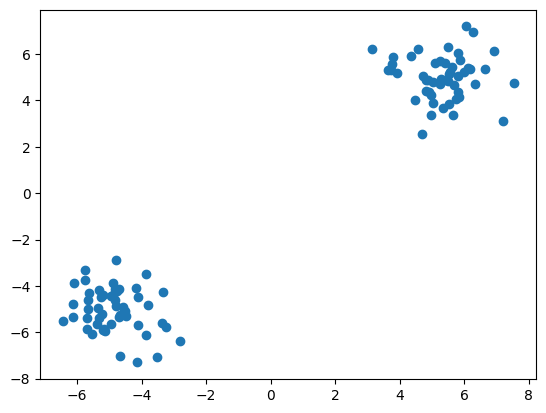

In [12]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5),(5,5)]
cluster_std = [1,1]

X,y = make_blobs(n_samples=100,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [13]:
import random

class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):
        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]
        for i in range(self.max_iter):
            # Assign Clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # Move Centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # Check Finish
            if(old_centroids==self.centroids).all():
                break
        return cluster_group
    def assign_clusters(self,X):
        cluster_group = []
        distances = []
        for row in X:
            for centroid in self.centroids:
                # Euclidean Distance
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []
        cluster_type = np.unique(cluster_group)
        for type in cluster_type:
            new_centroids.append(X[cluster_group==type].mean(axis=0))

        return np.array(new_centroids)


In [14]:
km = KMeans(n_clusters=4,max_iter=500)
y_means = km.fit_predict(X)

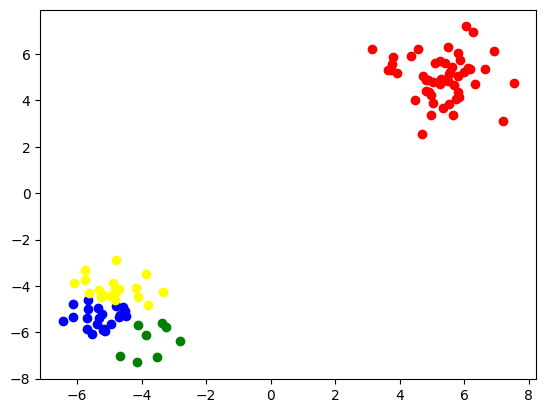

In [15]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.show()